This week's assignment is to:
1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission.

Group members: Habib Khan, Vijaya Cherukuri, Priya Shaji, Abdellah Ait Elmouden

In [4]:
import os.path
import gzip
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

Data Source:

The dataset is taken from https://snap.stanford.edu/data/ego-Twitter.html . It is called 
"Social Circles: Twitter".

This dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks.

We will write methed to load the data by passing the Edgelist file. We are using netwrokx's read_edgelist method to read edgelist from facebook_combined.txt file. This function retrun Graph object ('networkx.classes.graph.Graph') which can be used to work regualar netwrokx graph object.

In [5]:
def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    
    return edgeGraph

In [6]:
# Setting the path for edgelist file from Twitter
tweetPath = '/Users/priyashaji/Documents/cunymsds/Summer20/data620/week 2/twitter_combined.txt'
tweetGraph  = dataGraph(tweetPath)
type (tweetGraph)
print("Converted Graph's file type is: ", type(tweetGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


In [7]:
print( nx.info(tweetGraph))

Name: 
Type: Graph
Number of nodes: 81033
Number of edges: 1335241
Average degree:  32.9555


In [8]:
# Creating a subnetwork, a subset of data is created by finding the neighbours from node '17116707'

# Using subgraph() function from networkx

nodes = tweetGraph.neighbors('17116707')
sub_network = tweetGraph.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: Graph
Number of nodes: 257
Number of edges: 8213
Average degree:  63.9144


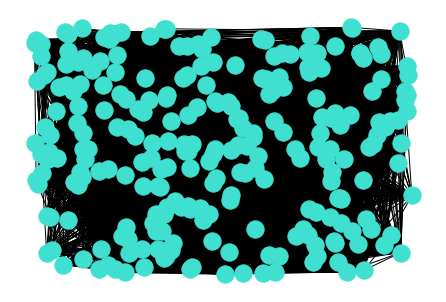

In [9]:
nx.draw_random(sub_network, node_color ='turquoise')

In [10]:
# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
nx.degree(sub_network)

DegreeView({'280365428': 119, '210643325': 11, '121533789': 164, '265077741': 52, '389742937': 81, '557330074': 46, '34428380': 249, '242692217': 53, '536342011': 25, '100318079': 113, '125120339': 30, '104646268': 13, '90966499': 13, '464740498': 23, '398430770': 22, '231238695': 58, '290778913': 15, '144631425': 113, '271224667': 41, '115207696': 14, '357622339': 27, '232706326': 39, '287999850': 51, '71663567': 20, '112939321': 89, '264019688': 28, '56860418': 165, '295361839': 12, '248179455': 52, '265498278': 68, '177251321': 40, '258961912': 37, '208549187': 53, '42576711': 24, '271261403': 34, '117674417': 159, '251722718': 27, '107830991': 136, '236026868': 17, '22462180': 249, '228270980': 123, '134246842': 38, '183756503': 16, '197881393': 94, '100581193': 141, '324585464': 46, '358775055': 143, '322059283': 24, '76106023': 91, '267980765': 29, '208132323': 185, '41099682': 34, '496438192': 85, '230002714': 20, '42054468': 15, '163436784': 9, '400689940': 46, '290309885': 27,

In [11]:
# Check if graph is connected

nx.is_connected(sub_network)


True

In [12]:
# Create list of connected graphs

def connected_component_subgraphs(network):
    for c in nx.connected_components(network):
        return network.subgraph(c)

In [13]:
connected_components  = connected_component_subgraphs(sub_network)

In [14]:
# Find number of nodes for each connected graph
[len(g) for g in connected_components] # the first and largest is most important

[9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 7,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,


In [15]:
# Show all of the connected components
sorted(nx.connected_components(connected_components))

[{'100318079',
  '100581193',
  '101882558',
  '103598216',
  '104646268',
  '107511013',
  '107830991',
  '112090416',
  '112939321',
  '115207696',
  '115340622',
  '117674417',
  '117901353',
  '117946816',
  '118140919',
  '118891136',
  '121533789',
  '123371682',
  '124528830',
  '125120339',
  '127774725',
  '131029775',
  '131299403',
  '132543607',
  '134246842',
  '134507601',
  '134940306',
  '135218281',
  '136441583',
  '140210260',
  '144631425',
  '147071808',
  '148745060',
  '153226312',
  '157829215',
  '158419434',
  '163436784',
  '164880154',
  '166899286',
  '167232760',
  '169325448',
  '172883064',
  '175553601',
  '177251321',
  '178077574',
  '17868918',
  '180862003',
  '181701688',
  '183756503',
  '184097849',
  '187132738',
  '191471322',
  '192576354',
  '19358562',
  '196327549',
  '197504076',
  '197881393',
  '19933035',
  '202195505',
  '202256799',
  '205979455',
  '206923844',
  '208132323',
  '208549187',
  '210643325',
  '211507422',
  '212617400'

In [16]:
# Diameter of the graph
nx.diameter(sub_network)

3